In [6]:
import csv

with open('data/20230312_171248.csv', 'r') as f:
    reader = csv.reader(f)
    data = list(reader)

In [7]:
from datetime import datetime
from dateutil.parser import parse


def from_row(row):
    date, raw, c, f = row
    date = parse(date)
    raw, c, f = float(raw), float(c), float(f)
    return date, raw, c, f


x = []
y = []
for row in data:
    date, _, _, f = from_row(row)
    x.append(date)
    y.append(f)

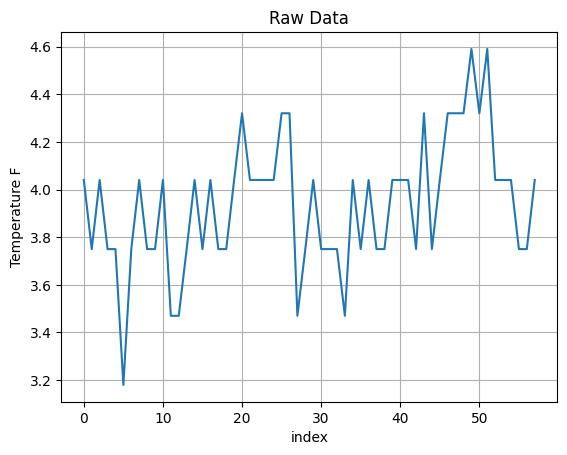

In [8]:
import matplotlib.pyplot as plt


def plot_data(data, title='Raw Data', xlabel='index', ylabel='Temperature F'):
    plt.plot(data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()

plot_data(y)

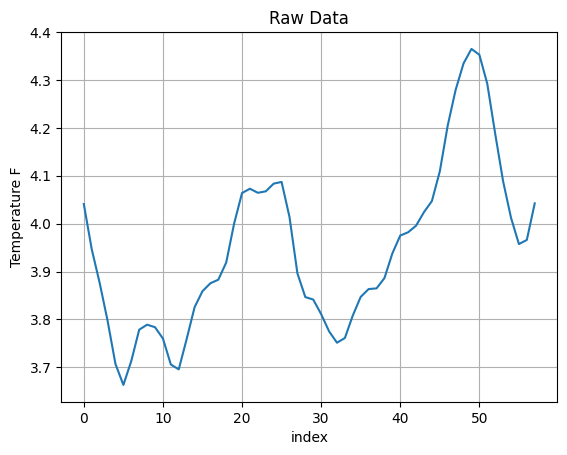

In [9]:
from scipy.signal import filtfilt, butter

b, a = butter(1, 0.2)
clean = filtfilt(b, a, y)
plot_data(clean)

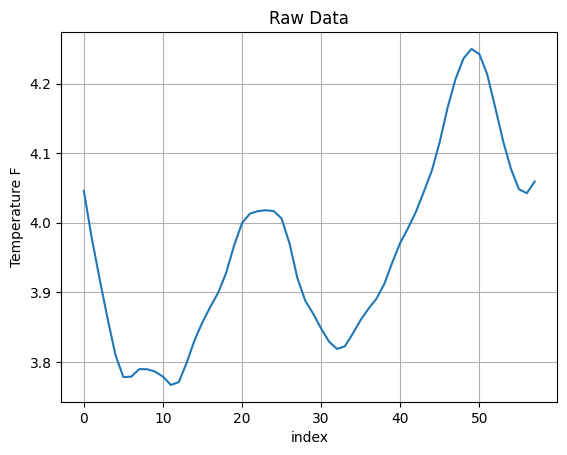

In [11]:
b, a = butter(1, 0.1)
clean = filtfilt(b, a, y)
plot_data(clean)